In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
data = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/proteins-2019-05-01.csv")
data.pdbid = data.pdbid.apply(lambda x: x[2:-1])

In [4]:
data.head()

,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,comments,pdbid,resolution,...,species_id,family_id,superfamily_id,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at
0,1,2024.0,OmpA family,Escherichia coli,Gram-neg. outer,"Outer membrane protein A (OMPA), disordered loops",NaN,OmpA is required for the action of colicins K ...,1qjp,1.65,...,9,34,26,2,1,3,1,2,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
1,2,2028.0,Enterobacterial Ail/Lom protein,Escherichia coli,Gram-neg. outer,Outer membrane protein X (OMPX),NaN,OmpX from Escherichia coli promotes adhesion t...,1qj8,1.90,...,9,355,26,2,1,7,1,1,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
2,3,2033.0,Opacity porins,Neisseria meningitidis,Gram-neg. outer,Outer membrane protein NspA,NaN,Pathogenic Neisseria spp. possess a repertoire...,1p4t,2.55,...,24,337,235,2,1,0,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
3,4,1740.0,Influenza virus matrix protein 2,Influenza virus,Viral,"M2 proton channel of Influenza A, closed state...",NaN,NaN,3lbw,1.65,...,51,263,185,11,1,3,4,0,2018-08-13 03:49:46 UTC,2018-10-02 17:42:36 UTC
4,5,2045.0,"OM protease omptin, OMPT",Yersinia pestis,Gram-neg. outer,Plasminogen activator PLA (coagulase/fibrinoly...,NaN,NaN,2x55,1.85,...,299,36,27,2,1,2,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC


In [8]:
d = data.query("classtype_id == 1")
dd = d.groupby("superfamily_id").apply(pd.DataFrame.sample, 5, replace=True).reset_index(drop=True)

In [10]:
dd.shape

(600, 31)

In [13]:
ddd = dd.drop_duplicates().reset_index(drop=True)

In [15]:
ddd.to_csv("/Users/weilu/Research/database/membrane_training_set/chosen_more_data.csv")

In [17]:
a = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/chosen_more_data.csv", index_col=0)

In [19]:
a.shape

(344, 31)

In [22]:
# print(a.pdbid.tolist())
pdb_list = a.pdbid.tolist()

In [27]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_more_data/dompdb/"
filtered_list = []
for pdb in pdb_list:
    location = pre + f"{pdb}.pdb"
    a = get_inside_or_not_table(location)
    # ratio = sum(a)/len(a)
    ratio = sum(a)/(len(a)+1e-6)
    if ratio < 0.4:
        print("not good", pdb, ratio)
    else:
        filtered_list.append(pdb)
    # print(pdb, ratio)

not good 4l6v 0.32476319306527307
not good 6hqb 0.3249001327231689
not good 6btm 0.08144796343236216
not good 1kqf 0.0
not good 6f0k 0.091787439170109
not good 4ysx 0.0
not good 6adq 0.13461538418392505
not good 3j9u 0.0
not good 4b2q 0.0
not good 3j9t 0.0
not good 4u2q 0.08460471555533326
not good 5goa 0.051709027154043526
not good 6nr2 0.2149877147236023
not good 3udc 0.15355805185933313
not good 3t9n 0.1691729316948386
not good 5y4o 0.18834080633031028
not good 4y7k 0.21199999915200002
not good 4y7j 0.33195020609149295
not good 3jad 0.24629080045611038
not good 6his 0.20671834571907405
not good 5sxv 0.26298701213315906
not good 6dg7 0.21227621429085367
not good 5njy 0.27009646215403066
not good 2gif 0.2625968989703518
not good 5xap 0.35792349677879304
not good 6nzi 0.2660731945933994
not good 6dmo 0.26476578384443406
not good 6baj 0.2607421872453689
not good 6eti 0.2614840984779433
not good 2onk 0.0
not good 5tv4 0.22280701715297013
not good 4ksd 0.22504230099404202
/Users/weilu/Res

In [28]:
len(filtered_list)

209

In [29]:
pdb_list = filtered_list

In [35]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_more_data/"
for pdb in pdb_list:
    toLocation = pre + f"dompdb/{pdb}.pdb"
    location = pre + f"cleaned_pdbs/{pdb}.pdb"
    extractTransmembrane(toLocation, location)

In [37]:
with open("/Users/weilu/Research/server/may_2019/four_body_helix_more_data/optimization/protein_list", "w") as out:
    for pdb in pdb_list:
        # print(pdb)
        out.write(pdb+"\n")

In [41]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_more_data/"
for pdb in pdb_list:
    location = f"{pre}database/dompdb/{pdb}.pdb"
    toLocation = f"{pre}database/S20_seq/{pdb}.seq"
    seq,resseqs = getSeqFromPDB(location, considerGap=False)
    with open(toLocation, "w") as out:
        out.write(seq+'\n')

In [42]:
pre = '/Users/weilu/Research/server/may_2019/four_body_helix/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k1000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys2000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k2000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys4000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k4000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys8000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k8000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys8000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma_filtered"
gamma_k8000_f = np.loadtxt(location)


In [47]:
pre = '/Users/weilu/Research/server/may_2019/four_body_helix_more_data/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_6_True_gamma"
gamma_more = np.loadtxt(location)

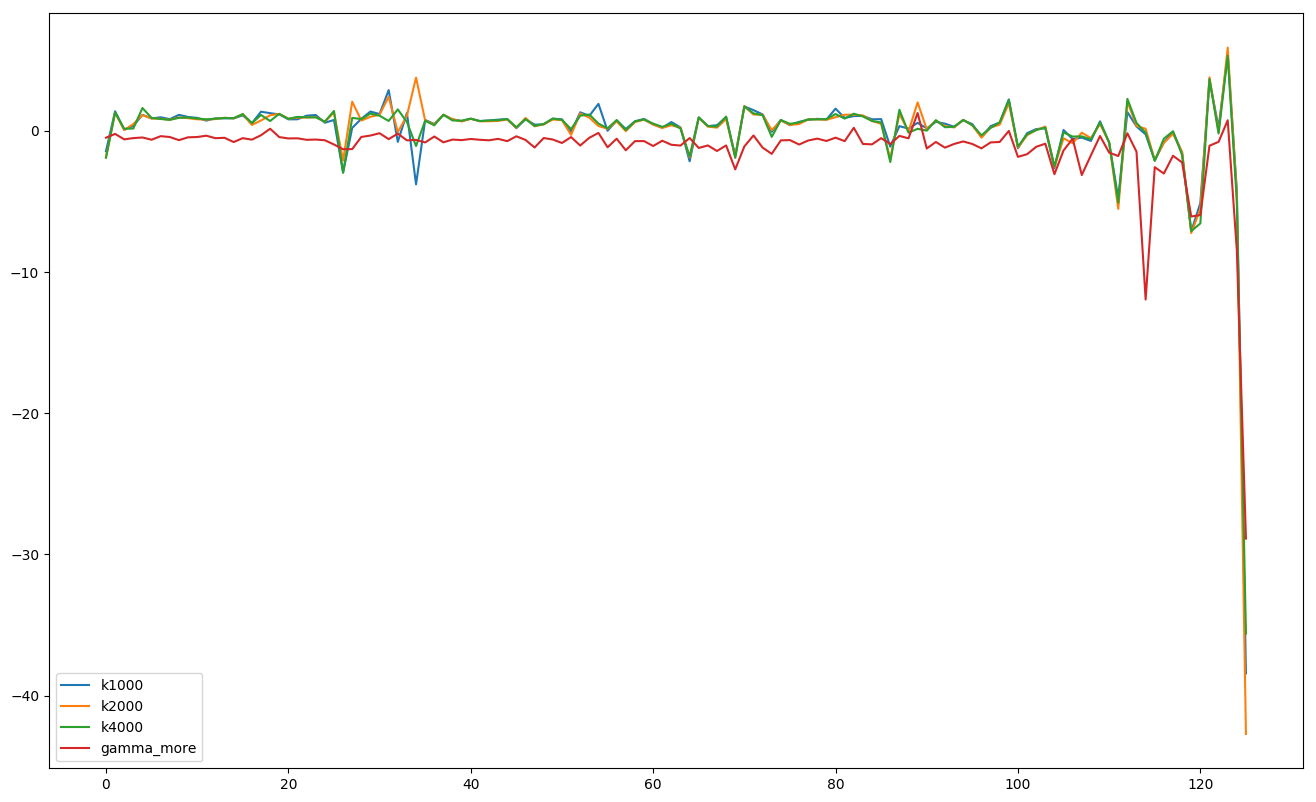

In [49]:
plt.plot(gamma_k1000, label="k1000")
plt.plot(gamma_k2000, label="k2000")
plt.plot(gamma_k4000, label="k4000")
plt.plot(gamma_more, label="gamma_more")
# plt.plot(gamma_k8000, label="k8000")
# plt.plot(gamma_k8000_centered, label="k8000_center")
plt.legend()

(-5, 5)

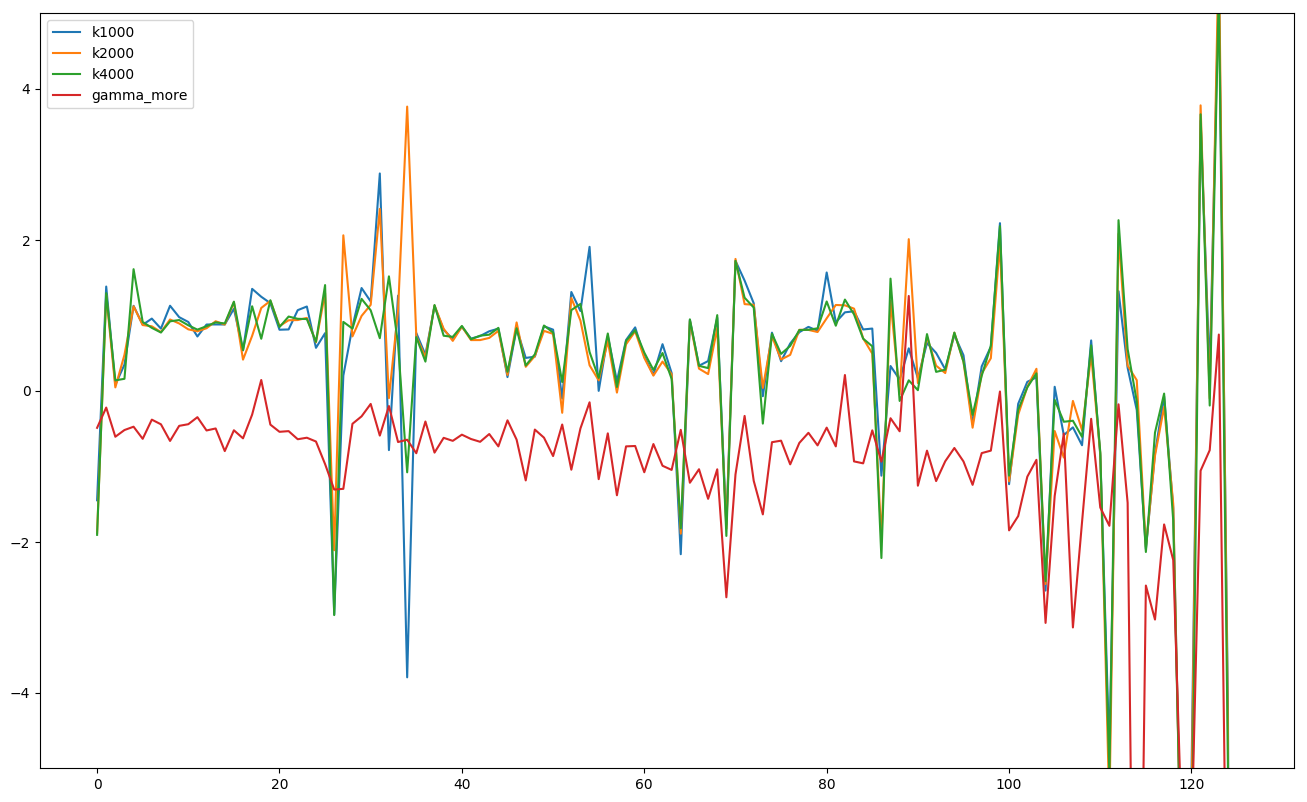

In [48]:
plt.plot(gamma_k1000, label="k1000")
plt.plot(gamma_k2000, label="k2000")
plt.plot(gamma_k4000, label="k4000")
plt.plot(gamma_more, label="gamma_more")
# plt.plot(gamma_k8000, label="k8000")
# plt.plot(gamma_k8000_centered, label="k8000_center")
plt.legend()
plt.ylim(-5,5)

In [50]:
import glob
a = glob.glob("/Users/weilu/Research/server/may_2019/four_body_helix_more_data/optimization/data/*.dat")
data_all = []
for d in a:
    name = d.split("/")[-1].split("-")[0]
    tmp = pd.read_csv(d, sep=" ", names=["res_pair1_chain", "res_pair1_index_1", "res_pair1_index_2", 
                               "res_pair2_chain", "res_pair2_index_1", "res_pair2_index_2", 
                               "res_type",  "six_letter_string", "total_phi",
                              "d00", "d11", "d01", "d10"])
    data_all.append(tmp.assign(protein=name))
data = pd.concat(data_all)
data = data.reset_index(drop=True)
data["six_letter_string"] = data["six_letter_string"].astype(str).str.pad(width=6, fillchar="0")

In [52]:
data.head()

,res_pair1_chain,res_pair1_index_1,res_pair1_index_2,res_pair2_chain,res_pair2_index_1,res_pair2_index_2,res_type,six_letter_string,total_phi,d00,d11,d01,d10,protein
0,A,15,19,A,77,81,GAVF,110101,0.691777,8.218560,9.569242,6.418541,4.126931,2c3e
1,A,17,21,A,283,287,ASGL,120100,0.687627,10.557247,5.287187,6.421049,4.385104,2c3e
2,A,17,21,A,286,290,ASVY,020101,0.995874,8.894876,6.960624,5.734986,4.060895,2c3e
3,A,18,22,A,76,80,AKNY,010021,0.987386,8.097395,8.315829,4.241660,3.940909,2c3e
4,A,19,23,A,73,77,ATNV,020110,0.995154,9.297452,6.720541,4.126931,5.918079,2c3e


In [53]:
data["six_letter_string"].value_counts()

020200    710
010300    505
030100    430
110200    427
120100    422
010201    413
020101    334
110101    295
210100    244
020110    242
010210    240
130000    210
220000    204
000400    200
120001    195
110110    176
000301    161
010111    157
010102    145
100300    144
100201    142
200200    135
011200    131
120010    128
040000    125
030001    124
021100    109
210001    108
000310    101
200101     98
         ... 
011002      8
100012      7
100030      7
101011      6
000022      6
202000      5
012100      5
000031      4
001012      4
101002      4
022000      3
012010      3
201010      2
012001      2
002101      2
001003      2
301000      2
002011      2
000004      2
000013      2
102100      2
002002      1
102010      1
002110      1
102001      1
002020      1
112000      1
000040      1
002200      1
001021      1
Name: six_letter_string, Length: 118, dtype: int64

In [ ]:
def getSeqFromPDB(location, considerGap=True):
    x = PDBParser().get_structure("x", location)
    seq = ""
    resseqs = []
    preResId = 0
    for res in x.get_residues():
        resId = res.get_id()[1]
        if considerGap and resId != preResId + 1:
            seq += " "
            resseqs.append(-1)
        seq += three_to_one(res.get_resname())
        resseqs.append(res.get_id()[1])
        preResId = resId
    return seq,resseqs